c:\users\administrator\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:198: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


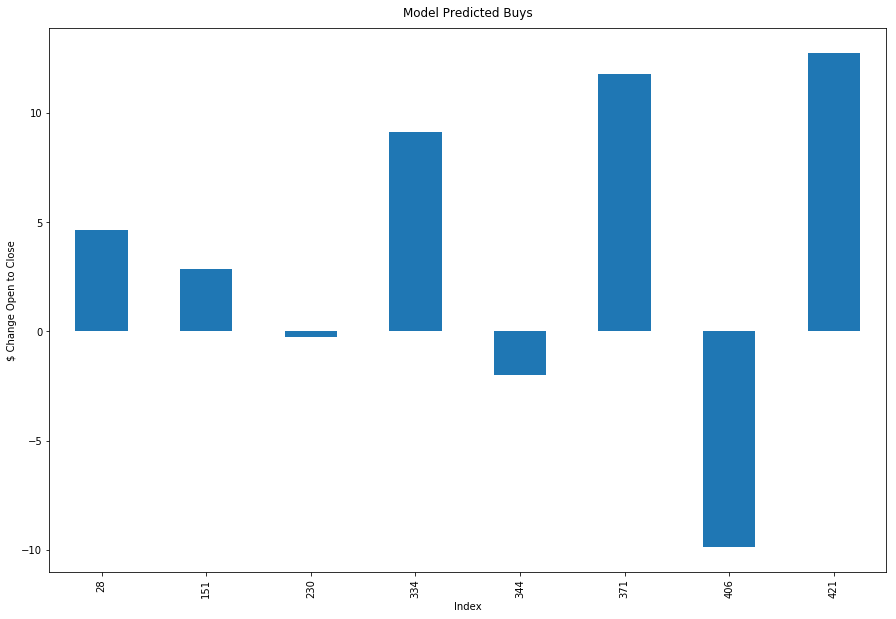

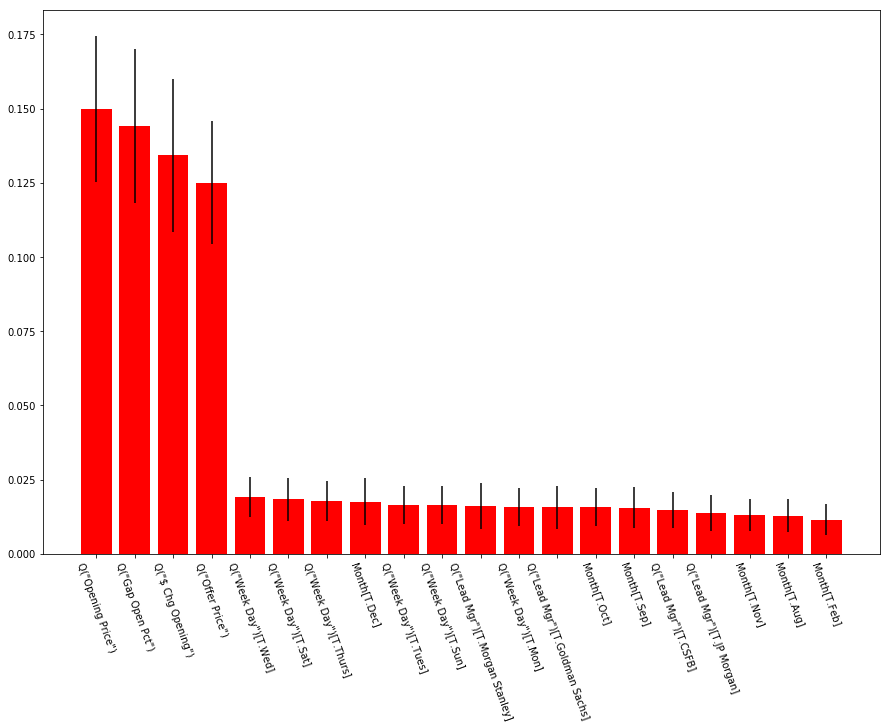

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
%matplotlib inline

ipos = pd.read_csv(r'd:/python_work/machine-learning/regression/ipo-data.csv', encoding = 'latin-1')
ipos
#ipos.columns = ['Date', 'Offer Price', 'Opening Price', '1st Day Close', '1st Day % Px Chng', '$ Chg Close', '$ Chg Opening', 'Star Ratings']

ipos = ipos.applymap(lambda x : x if not '$' in str(x) else x.replace('$', ''))
ipos = ipos.applymap(lambda x : x if not '%' in str(x) else x.replace('%', ''))
ipos = ipos.applymap(lambda x : x if not '(' in str(x) else x.replace('(', ''))
ipos = ipos.applymap(lambda x : x if not ')' in str(x) else x.replace(')', ''))

ipos.replace('N/C', 0, inplace = True)

ipos['Date'] = pd.to_datetime(ipos['Date'])

ipos['Offer Price'] = ipos['Offer Price'].astype('float')
ipos['Opening Price'] = ipos['Opening Price'].astype('float')
ipos['1st Day Close'] = ipos['1st Day Close'].astype('float')
ipos['1st Day % Px Chng'] = ipos['1st Day % Px Chng'].astype('float')
ipos['$ Chg Close'] = ipos['$ Chg Close'].astype('float')
ipos['$ Chg Opening'] = ipos['$ Chg Opening'].astype('float')
ipos['Star Ratings'] = ipos['Star Ratings'].astype('int')

#ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng'].mean().plot(kind = 'bar', figsize = (15, 20), color = 'k', title = '1st Day Mean IPO Percentage Change')

#ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng'].median().plot(kind = 'bar', figsize = (15, 20), color = 'k', title = '1st Day Median IPO Percentage Change')

#ipos['1st Day % Px Chng'].hist(figsize = (15, 7), bins = 100, color = 'grey')

ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close'] / ipos['Opening Price']) * 100 

#ipos[ipos['Date'] >= '2010-01-01']['$ Chg Open to Close'].describe()

#ipos[(ipos['Date'] >= '2010-01-01') & (ipos['$ Chg Open to Close'] > 0)]['$ Chg Open to Close'].describe()

#ipos[(ipos['Date'] >= '2010-01-01') & (ipos['$ Chg Open to Close'] < 0)]['$ Chg Open to Close'].describe()

ipos['Lead Mgr'] = ipos['Manager'].map(lambda x : x.split('/')[0])
ipos['Lead Mgr'] = ipos['Lead Mgr'].map(lambda x : x.strip())

ipos.loc[ipos['Lead Mgr'].str.contains('Hambrecht'),'Lead Mgr'] = 'WR Hambrecht+Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Edwards'), 'Lead Mgr'] = 'AG Edwards'

ipos.loc[ipos['Lead Mgr'].str.contains('Edwrads'), 'Lead Mgr'] = 'AG Edwards'

ipos.loc[ipos['Lead Mgr'].str.contains('Barclay'), 'Lead Mgr'] = 'Barclays'

ipos.loc[ipos['Lead Mgr'].str.contains('Aegis'), 'Lead Mgr'] = 'Aegis Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Deutsche'), 'Lead Mgr'] = 'Deutsche Bank'

ipos.loc[ipos['Lead Mgr'].str.contains('Suisse'), 'Lead Mgr'] = 'CSFB'

ipos.loc[ipos['Lead Mgr'].str.contains('CS.?F'), 'Lead Mgr'] = 'CSFB'

ipos.loc[ipos['Lead Mgr'].str.contains('^Early'), 'Lead Mgr'] = 'EarlyBirdCapital'

ipos.loc[325,'Lead Mgr'] = 'Maximum Captial'

ipos.loc[ipos['Lead Mgr'].str.contains('Keefe'), 'Lead Mgr'] = 'Keefe, Bruyette & Woods'

ipos.loc[ipos['Lead Mgr'].str.contains('Stan'), 'Lead Mgr'] = 'Morgan Stanley'

ipos.loc[ipos['Lead Mgr'].str.contains('P. Morg'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('PM'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('J\.P\.'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('Banc of'), 'Lead Mgr'] = 'Banc of America'

ipos.loc[ipos['Lead Mgr'].str.contains('Lych'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Merrill$'), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Lymch'), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('A Merril Lynch'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Merril '), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('BofA$'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('SANDLER'), 'Lead Mgr'] = 'Sandler O\'neil + Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Sandler'), 'Lead Mgr'] = 'Sandler O\'Neil + Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Renshaw'), 'Lead Mgr'] = 'Rodman & Renshaw'

ipos.loc[ipos['Lead Mgr'].str.contains('Baird'), 'Lead Mgr'] = 'RW Baird'

ipos.loc[ipos['Lead Mgr'].str.contains('Cantor'), 'Lead Mgr'] = 'Cantor Fitzgerald'

ipos.loc[ipos['Lead Mgr'].str.contains('Goldman'), 'Lead Mgr'] = 'Goldman Sachs'

ipos.loc[ipos['Lead Mgr'].str.contains('Bear'), 'Lead Mgr'] = 'Bear Stearns'

ipos.loc[ipos['Lead Mgr'].str.contains('BoA'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Broadband'), 'Lead Mgr'] = 'Broadband Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Davidson'), 'Lead Mgr'] = 'DA Davidson'

ipos.loc[ipos['Lead Mgr'].str.contains('Feltl'), 'Lead Mgr'] = 'Feltl & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('China'), 'Lead Mgr'] = 'China International'

ipos.loc[ipos['Lead Mgr'].str.contains('Cit'), 'Lead Mgr'] = 'Citigroup'

ipos.loc[ipos['Lead Mgr'].str.contains('Ferris'), 'Lead Mgr'] = 'Ferris Baker Watts'

ipos.loc[ipos['Lead Mgr'].str.contains('Friedman|Freidman|FBR'), 'Lead Mgr'] = 'Friedman Billings Ramsey'

ipos.loc[ipos['Lead Mgr'].str.contains('^I-'), 'Lead Mgr'] = 'I-Bankers'

ipos.loc[ipos['Lead Mgr'].str.contains('Gunn'), 'Lead Mgr'] = 'Gunn Allen'

ipos.loc[ipos['Lead Mgr'].str.contains('Jeffer'), 'Lead Mgr'] = 'Jefferies'

ipos.loc[ipos['Lead Mgr'].str.contains('Oppen'), 'Lead Mgr'] = 'Oppenheimer'

ipos.loc[ipos['Lead Mgr'].str.contains('JMP'), 'Lead Mgr'] = 'JMP Securities'

ipos.loc[ipos['Lead Mgr'].str.contains('Rice'), 'Lead Mgr'] = 'Johnson Rice'

ipos.loc[ipos['Lead Mgr'].str.contains('Ladenburg'), 'Lead Mgr'] = 'Ladenburg Thalmann'

ipos.loc[ipos['Lead Mgr'].str.contains('Piper'), 'Lead Mgr'] = 'Piper Jaffray'

ipos.loc[ipos['Lead Mgr'].str.contains('Pali'), 'Lead Mgr'] = 'Pali Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Paulson'), 'Lead Mgr'] = 'Paulson Investment Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Roth'), 'Lead Mgr'] = 'Roth Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Stifel'), 'Lead Mgr'] = 'Stifel Nicolaus'

ipos.loc[ipos['Lead Mgr'].str.contains('SunTrust'), 'Lead Mgr'] = 'SunTrust Robinson'

ipos.loc[ipos['Lead Mgr'].str.contains('Wachovia'), 'Lead Mgr'] = 'Wachovia'

ipos.loc[ipos['Lead Mgr'].str.contains('Wedbush'), 'Lead Mgr'] = 'Wedbush Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('Blair'), 'Lead Mgr'] = 'William Blair'

ipos.loc[ipos['Lead Mgr'].str.contains('Wunderlich'), 'Lead Mgr'] = 'Wunderlich'

ipos.loc[ipos['Lead Mgr'].str.contains('Max'), 'Lead Mgr'] = 'Maxim Group'

ipos.loc[ipos['Lead Mgr'].str.contains('CIBC'), 'Lead Mgr'] = 'CIBC'

ipos.loc[ipos['Lead Mgr'].str.contains('CRT'), 'Lead Mgr'] = 'CRT Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('HCF'),'Lead Mgr'] = 'HCFP Brenner'

ipos.loc[ipos['Lead Mgr'].str.contains('Cohen'), 'Lead Mgr']  = 'Cohen & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Cowen'), 'Lead Mgr'] = 'Cowen & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Leerink'), 'Lead Mgr']  = 'Leerink Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Lynch\xca'), 'Lead Mgr'] = 'Merrill Lynch'

ipos['Week Day'] = ipos['Date'].dt.dayofweek.map({0: 'Mon', 1: 'Tues', 2: 'Wed', \
                                                  3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'})
ipos['Month'] = ipos['Date'].map(lambda x : x.month)
ipos['Month'] = ipos['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul',\
                                   8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

ipos['Gap Open Pct'] = (ipos['$ Chg Opening'] / ipos['Opening Price']) * 100
ipos['Open to Close Pct'] = (ipos['$ Chg Close'] - ipos['$ Chg Opening']) / ipos['Opening Price'] * 100

from patsy import dmatrix
X = dmatrix('Month + Q("Week Day") + Q("Gap Open Pct") + Q("$ Chg Opening") + Q("Lead Mgr") \
+ Q("Offer Price") + Q("Opening Price")', data = ipos, return_type = 'dataframe')

X_train, X_test = X[:2355], X[2355:]

y_train = ipos['$ Chg Open to Close'][:2355].map(lambda x : 1 if x >= 1 else 0)

y_test = ipos['$ Chg Open to Close'][2355:].map(lambda x : 1 if x >= 1 else 0)

clf = linear_model.LogisticRegression()

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

ipos[ipos['Date'] >= '2012-01-01']['$ Chg Open to Close'].describe()

pred_label = clf.predict(X_test)
results = []
for p1, t1, idx, chg in zip(pred_label, y_test, y_test.index, \
                           ipos.ix[y_test.index]['$ Chg Open to Close']):
    if p1 == t1:
        results.append([idx, chg, p1, t1, 1])
    else:
        results.append([idx, chg, p1, t1, 0])

rf = pd.DataFrame(results, columns = ['index', '$ chg', 'predicted', 'actual', 'correct'])

rf[rf['predicted'] == 1]['$ chg'].describe()

fix, ax = plt.subplots(figsize = (15, 10))
rf[rf['predicted'] == 1]['$ chg'].plot(kind = 'bar')

ax.set_title('Model Predicted Buys', y = 1.01)
ax.set_ylabel('$ Change Open to Close')
ax.set_xlabel('Index')

fv = pd.DataFrame(X_train.columns, clf.coef_.T).reset_index()
fv.columns = ['Coef', 'Feature']
fv.sort_values('Coef', ascending = 0).reset_index(drop = True)

fv[fv['Feature'].str.contains('Week Day')]

# RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators = 1000)
clf_rf.fit(X_train, y_train)
f_importances = clf_rf.feature_importances_
f_names = X_train
f_std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis = 0)

zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key = lambda x : x[0], reverse = True)
imps = [x[0] for x in zzs[:20]]
labels = [x[1] for x in zzs[:20]]
errs = [x[2] for x in zzs[:20]]

plt.subplots(figsize = (15, 10))
plt.bar(range(20), imps, color = "r", yerr = errs, align = "center")
plt.xticks(range(20), labels, rotation = -70);
